In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import model_selection, preprocessing, linear_model, metrics
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import ensemble
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from textblob import Word
nltk.download('wordnet')

from termcolor import colored
from warnings import filterwarnings
filterwarnings('ignore')

from sklearn import set_config
set_config(print_changed_only = False)

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\manis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\manis\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [9]:
pwd

'C:\\Users\\manis'

In [10]:
train_set = pd.read_csv("C:/Users/manis/Twitter sentiment analysis_train.csv",
                   encoding = "utf-8",
                   engine = "python",
                   header = 0)


In [11]:
train_set.head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [12]:
train_set.shape

(31962, 3)

In [13]:
#get general information about train set

train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [14]:
#check whether there are duplicated values

train_set.duplicated().sum()

0

In [16]:
#get the number of classes of the "label" variable of train set

train_set.groupby("label").count()

,id,tweet
label,,
0,29720,29720
1,2242,2242


## Feature Engineering ( PROCESS DATA )

In [17]:
#convert uppercase letters to lowercase letters in "tweet" columns

train_set["tweet"] = train_set["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))

print(colored("\nCONVERTED SUCCESFULLY...", "green"))


CONVERTED SUCCESFULLY...


In [18]:
#delete punctuation marks from "tweet" columns

train_set["tweet"] = train_set["tweet"].str.replace('[^\w\s]','')


print(colored("\nDELETED SUCCESFULLY...", "green"))


DELETED SUCCESFULLY...


In [19]:
#delete numbers from "tweet" columns

train_set['tweet'] = train_set['tweet'].str.replace('\d','')


print(colored("\n NUMBERS DELETED SUCCESFULLY...", "green"))


 NUMBERS DELETED SUCCESFULLY...


In [20]:
#delete stopwords from "tweet" columns

sw = stopwords.words("english")
train_set['tweet'] = train_set['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

print(colored("\nSTOPWORDS DELETED SUCCESFULLY...", "green"))


STOPWORDS DELETED SUCCESFULLY...


In [21]:
#lemmatization. That is, we get the roots of the words in the "tweet" columns

train_set['tweet'] = train_set['tweet'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

print(colored("\nDONE SUCCESFULLY...", "green"))


DONE SUCCESFULLY...


In [22]:
#drop "id" column from datasets

train_set = train_set.drop("id", axis = 1)

print(colored("\n'ID' COLUMNS DROPPED SUCCESFULLY...", "green"))


'ID' COLUMNS DROPPED SUCCESFULLY...


In [24]:
#look at the latest condition of train set

train_set.head(10)

,label,tweet
0,0,user father dysfunctional selfish drag kid dys...
1,0,user user thanks lyft credit cant use cause do...
2,0,bihday majesty
3,0,model love u take u time urð ðððð ððð
4,0,factsguide society motivation
5,0,huge fan fare big talking leave chaos pay disp...
6,0,user camping tomorrow user user user user user...
7,0,next school year year examsð cant think ð scho...
8,0,love land allin cavs champion cleveland clevel...
9,0,user user welcome im gr


In [25]:
# split dataset into train test


x = train_set["tweet"]
y = train_set["label"]

train_x, test_x, train_y, test_y = model_selection.train_test_split(x, y,
                                                                    test_size = 0.25,
                                                                    shuffle = True,
                                                                    random_state = 11)


## VECTORIZE DATA

### "Count Vectors" method

In [27]:
vectorizer = CountVectorizer()
vectorizer.fit(train_x)

x_train_count = vectorizer.transform(train_x)
x_test_count = vectorizer.transform(test_x)

x_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### "TF-IDF" method

In [28]:
tf_idf_word_vectorizer = TfidfVectorizer()
tf_idf_word_vectorizer.fit(train_x)

x_train_tf_idf_word = tf_idf_word_vectorizer.transform(train_x)
x_test_tf_idf_word = tf_idf_word_vectorizer.transform(test_x)

x_train_tf_idf_word.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## BUILDING MACHINE LEARNING MODELS

### Logistic regression model with "count-vectors" method

In [80]:
log = linear_model.LogisticRegression()
log_model = log.fit(x_train_count, train_y)
accuracy = model_selection.cross_val_score(log_model,
                                           x_test_count,
                                           test_y,
                                           cv = 20).mean()

print("\nLogistic regression model with 'count-vectors' method")
print("Accuracy ratio: ", accuracy)


Logistic regression model with 'count-vectors' method
Accuracy ratio:  0.9463148496240601


In [81]:
pred=log_model.predict(x_test_count)

In [82]:
confusion_matrix(test_y,pred)

array([[7352,   40],
       [ 306,  293]], dtype=int64)

In [83]:
print(classification_report(test_y,pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      7392
           1       0.88      0.49      0.63       599

    accuracy                           0.96      7991
   macro avg       0.92      0.74      0.80      7991
weighted avg       0.95      0.96      0.95      7991



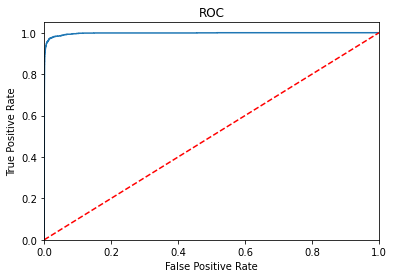

In [84]:
y = train_y
X = x_train_count

log_roc_auc = roc_auc_score(y, log_model.predict(X))

fpr, tpr, thresholds = roc_curve(y, log_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % log_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

### Logistic regression model with "tf-idf" method

In [85]:
log = linear_model.LogisticRegression()
log_model = log.fit(x_train_tf_idf_word, train_y)
accuracy = model_selection.cross_val_score(log_model,
                                           x_test_tf_idf_word,
                                           test_y,
                                           cv = 20).mean()

print("\nLogistic regression model with 'tf-idf' method")
print("Accuracy ratio: ", accuracy)


Logistic regression model with 'tf-idf' method
Accuracy ratio:  0.9353026315789474


In [86]:
pred=log_model.predict(x_test_tf_idf_word)

In [87]:
confusion_matrix(test_y,pred)

array([[7378,   14],
       [ 429,  170]], dtype=int64)

In [88]:
print(classification_report(test_y,pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      7392
           1       0.92      0.28      0.43       599

    accuracy                           0.94      7991
   macro avg       0.93      0.64      0.70      7991
weighted avg       0.94      0.94      0.93      7991



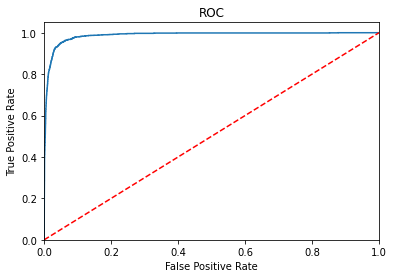

In [89]:
y = train_y
X = x_train_tf_idf_word

log_roc_auc = roc_auc_score(y, log_model.predict(X))

fpr, tpr, thresholds = roc_curve(y, log_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % log_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

### GradientBoostingClassifier model with "count-vectors" method

In [90]:
gbc = GradientBoostingClassifier()
gbc_model = gbc.fit(x_train_count,train_y)
accuracy = model_selection.cross_val_score(gbc_model,
                                           x_test_count,
                                           test_y,
                                           cv = 20).mean()

print("\nGradientBoosting Classifier model with 'count-vectors' method")
print("Accuracy ratio: ", accuracy)


GradientBoosting Classifier model with 'count-vectors' method
Accuracy ratio:  0.9419357769423558


In [91]:
pred=gbc_model.predict(x_test_count)

In [92]:
confusion_matrix(test_y,pred)

array([[7377,   15],
       [ 449,  150]], dtype=int64)

In [93]:
print(classification_report(test_y,pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      7392
           1       0.91      0.25      0.39       599

    accuracy                           0.94      7991
   macro avg       0.93      0.62      0.68      7991
weighted avg       0.94      0.94      0.93      7991



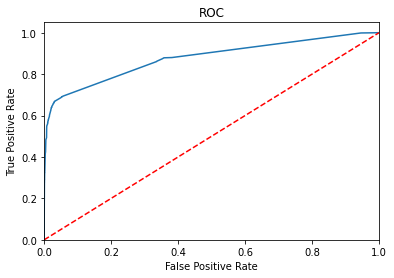

In [96]:
y = train_y
X = x_train_count.astype("float64")

gbc_roc_auc = roc_auc_score(y, gbc_model.predict(X))

fpr, tpr, thresholds = roc_curve(y, gbc_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % gbc_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

### GradientBoostingClassifier model with "tf-idf" method

In [97]:
gbc = GradientBoostingClassifier()
gbc_model = gbc.fit(x_train_tf_idf_word,train_y)
accuracy = model_selection.cross_val_score(gbc_model, 
                                           x_test_tf_idf_word, 
                                           test_y, 
                                           cv = 20).mean()

print("\nGradientBoosting Classifier model with 'tf-idf' method")
print("Accuracy ratio: ", accuracy)


GradientBoosting Classifier model with 'tf-idf' method
Accuracy ratio:  0.9405592105263156


In [98]:
pred=gbc_model.predict(x_test_tf_idf_word)

In [99]:
confusion_matrix(test_y,pred)

array([[7373,   19],
       [ 436,  163]], dtype=int64)

In [100]:
print(classification_report(test_y,pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      7392
           1       0.90      0.27      0.42       599

    accuracy                           0.94      7991
   macro avg       0.92      0.63      0.69      7991
weighted avg       0.94      0.94      0.93      7991



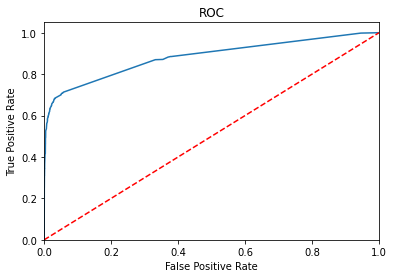

In [101]:
y = train_y
X = x_train_tf_idf_word.astype("float64")

gbc_roc_auc = roc_auc_score(y, gbc_model.predict(X))

fpr, tpr, thresholds = roc_curve(y, gbc_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % gbc_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

### AdaBoostClassifier model with "count-vectors" method

In [102]:
abc = AdaBoostClassifier()
abc_model = abc.fit(x_train_count,train_y)
accuracy = model_selection.cross_val_score(abc_model,
                                           x_test_count,
                                           test_y,
                                           cv = 20).mean()

print("\nAdaBoostClassifier Classifier model with 'count-vectors' method")
print("Accuracy ratio: ", accuracy)


AdaBoostClassifier Classifier model with 'count-vectors' method
Accuracy ratio:  0.9439404761904762


In [103]:
pred=abc_model.predict(x_test_count)

In [104]:
confusion_matrix(test_y,pred)

array([[7326,   66],
       [ 384,  215]], dtype=int64)

In [105]:
print(classification_report(test_y,pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      7392
           1       0.77      0.36      0.49       599

    accuracy                           0.94      7991
   macro avg       0.86      0.68      0.73      7991
weighted avg       0.94      0.94      0.93      7991



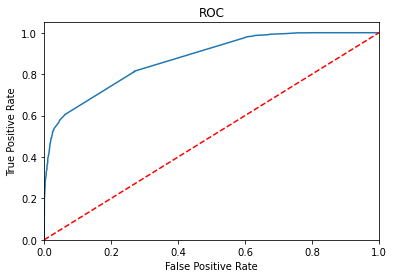

In [106]:
y = train_y
X = x_train_count.astype("float64")

abc_roc_auc = roc_auc_score(y, abc_model.predict(X))

fpr, tpr, thresholds = roc_curve(y, abc_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % abc_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

### AdaBoostClassifier model with "tf-idf" method

In [107]:
abc = AdaBoostClassifier()
abc_model = abc.fit(x_train_tf_idf_word,train_y)
accuracy = model_selection.cross_val_score(abc_model, 
                                           x_test_tf_idf_word, 
                                           test_y, 
                                           cv = 20).mean()

print("\nAdaBoostClassifier model with 'tf-idf' method")
print("Accuracy ratio: ", accuracy)


AdaBoostClassifier model with 'tf-idf' method
Accuracy ratio:  0.9413126566416039


In [108]:
pred=abc_model.predict(x_test_tf_idf_word)

In [109]:
confusion_matrix(test_y,pred)

array([[7321,   71],
       [ 395,  204]], dtype=int64)

In [110]:
print(classification_report(test_y,pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      7392
           1       0.74      0.34      0.47       599

    accuracy                           0.94      7991
   macro avg       0.85      0.67      0.72      7991
weighted avg       0.93      0.94      0.93      7991



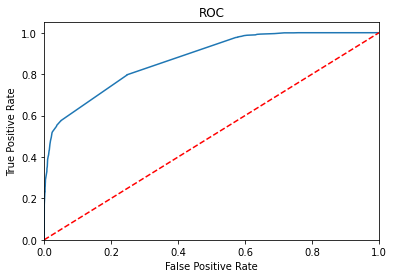

In [111]:
y = train_y
X = x_train_tf_idf_word.astype("float64")

abc_roc_auc = roc_auc_score(y, abc_model.predict(X))

fpr, tpr, thresholds = roc_curve(y, abc_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % abc_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

### RandomForestClassifier model with "count-vectors" method

In [112]:
rfc = RandomForestClassifier()
rfc_model = rfc.fit(x_train_count,train_y)
accuracy = model_selection.cross_val_score(rfc_model,
                                           x_test_count,
                                           test_y,
                                           cv = 20).mean()

print("\nRandomForestClassifier model with 'count-vectors' method")
print("Accuracy ratio: ", accuracy)


RandomForestClassifier model with 'count-vectors' method
Accuracy ratio:  0.9488186090225563


In [113]:
pred=rfc_model.predict(x_test_count)

In [114]:
confusion_matrix(test_y,pred)

array([[7358,   34],
       [ 303,  296]], dtype=int64)

In [115]:
print(classification_report(test_y,pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      7392
           1       0.90      0.49      0.64       599

    accuracy                           0.96      7991
   macro avg       0.93      0.74      0.81      7991
weighted avg       0.96      0.96      0.95      7991



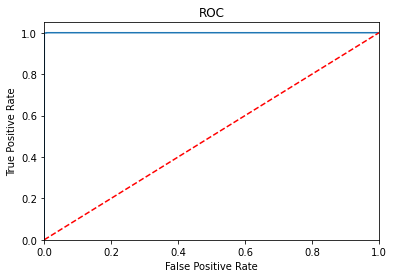

In [117]:
y = train_y
X = x_train_count.astype("float64")

rfc_roc_auc = roc_auc_score(y, rfc_model.predict(X))

fpr, tpr, thresholds = roc_curve(y, rfc_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % rfc_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

### RandomForestClassifier model with "tf-idf" method

In [118]:
rfc = RandomForestClassifier()
rfc_model = rfc.fit(x_train_tf_idf_word,train_y)
accuracy = model_selection.cross_val_score(rfc_model, 
                                           x_test_tf_idf_word, 
                                           test_y, 
                                           cv = 20).mean()

print("\nRandomForestClassifier model with 'tf-idf' method")
print("Accuracy ratio: ", accuracy)


RandomForestClassifier model with 'tf-idf' method
Accuracy ratio:  0.9466904761904761


In [119]:
pred=rfc_model.predict(x_test_tf_idf_word)

In [120]:
confusion_matrix(test_y,pred)

array([[7370,   22],
       [ 320,  279]], dtype=int64)

In [121]:
print(classification_report(test_y,pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      7392
           1       0.93      0.47      0.62       599

    accuracy                           0.96      7991
   macro avg       0.94      0.73      0.80      7991
weighted avg       0.96      0.96      0.95      7991



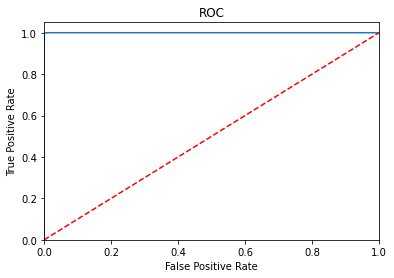

In [122]:
y = train_y
X = x_train_tf_idf_word

rfc_roc_auc = roc_auc_score(y, rfc_model.predict(X))

fpr, tpr, thresholds = roc_curve(y, rfc_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % rfc_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

### ExtraTreesClassifier model with "count-vectors" method

In [123]:
etc = ExtraTreesClassifier()
etc_model = etc.fit(x_train_count,train_y)
accuracy = model_selection.cross_val_score(etc_model,
                                           x_test_count,
                                           test_y,
                                           cv = 20).mean()

print("\nExtraTreesClassifier model with 'count-vectors' method")
print("Accuracy ratio: ", accuracy)


ExtraTreesClassifier model with 'count-vectors' method
Accuracy ratio:  0.9542011278195488


In [124]:
pred=etc_model.predict(x_test_count)

In [125]:
confusion_matrix(test_y,pred)

array([[7334,   58],
       [ 254,  345]], dtype=int64)

In [126]:
print(classification_report(test_y,pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      7392
           1       0.86      0.58      0.69       599

    accuracy                           0.96      7991
   macro avg       0.91      0.78      0.83      7991
weighted avg       0.96      0.96      0.96      7991



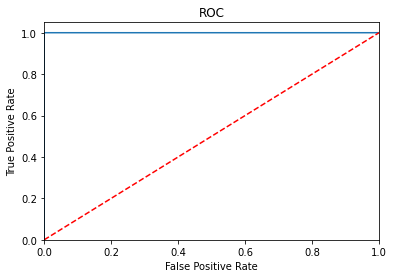

In [127]:
y = train_y
X = x_train_count.astype("float64")

etc_roc_auc = roc_auc_score(y, etc_model.predict(X))

fpr, tpr, thresholds = roc_curve(y, etc_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % etc_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

### ExtraTreesClassifier model with "tf-idf" method

In [129]:
etc = ExtraTreesClassifier()
etc_model = etc.fit(x_train_tf_idf_word,train_y)
accuracy = model_selection.cross_val_score(etc_model, 
                                           x_test_tf_idf_word, 
                                           test_y, 
                                           cv = 10).mean()

print("\nExtraTreesClassifier model with 'tf-idf' method")
print("Accuracy ratio: ", accuracy)


ExtraTreesClassifier model with 'tf-idf' method
Accuracy ratio:  0.9521963391739675


In [130]:
pred=etc_model.predict(x_test_tf_idf_word)

In [131]:
confusion_matrix(test_y,pred)

array([[7352,   40],
       [ 250,  349]], dtype=int64)

In [132]:
print(classification_report(test_y,pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      7392
           1       0.90      0.58      0.71       599

    accuracy                           0.96      7991
   macro avg       0.93      0.79      0.84      7991
weighted avg       0.96      0.96      0.96      7991



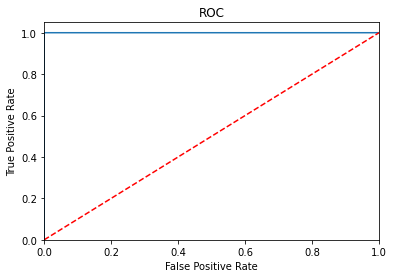

In [133]:
y = train_y
X = x_train_tf_idf_word.astype("float64")

etc_roc_auc = roc_auc_score(y, etc_model.predict(X))

fpr, tpr, thresholds = roc_curve(y, etc_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % etc_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()